<a href="https://colab.research.google.com/github/chrisZerv/Space-Missions-Analysis/blob/main/Space_Missions_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [2]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [3]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 38.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


### Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [3]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
shape = df_data.shape
print(f"Shape of the dataset: {shape[0]} rows and {shape[1]} columns")

Shape of the dataset: 4324 rows and 9 columns


In [5]:
columns = df_data.columns
print("Column names:", columns)

Column names: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [6]:
nan_values = df_data.isna().sum()
print("Missing values in each column:\n", nan_values)

duplicates = df_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Missing values in each column:
 Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64
Number of duplicate rows: 0


In [7]:
# Dropping the 'Unnamed: 0' and 'Unnamed: 0.1' columns as they seem irrelevant
df_cleaned = df_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

# Checking the updated dataframe structure
df_cleaned.head(), df_cleaned.columns

(  Organisation                                           Location  \
 0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
 1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
 2       SpaceX                      Pad A, Boca Chica, Texas, USA   
 3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
 4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
 
                          Date                                        Detail  \
 0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
 1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
 2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
 3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
 4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   
 
   Rocket_Status  Price Mission_Status  
 0  StatusActive   50.0        Success  
 1  StatusActi

In [8]:
# Remove commas from the 'Price' column and convert it to numeric
df_cleaned['Price'] = df_cleaned['Price'].replace(',', '', regex=True)
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'], errors='coerce')

# Replace NaN values in the 'Price' column with the median value
median_price = df_cleaned['Price'].median()
df_cleaned['Price'].fillna(median_price, inplace=True)

# Check if there are any remaining NaN values
print(df_cleaned['Price'].isna().sum())

0


## Descriptive Statistics

In [9]:
descriptive_stats = df_cleaned.describe(include='all')


In [10]:
print(descriptive_stats)

       Organisation                                    Location  \
count          4324                                        4324   
unique           56                                         137   
top       RVSN USSR  Site 31/6, Baikonur Cosmodrome, Kazakhstan   
freq           1777                                         235   
mean            NaN                                         NaN   
std             NaN                                         NaN   
min             NaN                                         NaN   
25%             NaN                                         NaN   
50%             NaN                                         NaN   
75%             NaN                                         NaN   
max             NaN                                         NaN   

                              Date                               Detail  \
count                         4324                                 4324   
unique                        4319           

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [11]:
# Count the number of launches by each organisation
launches_by_org = df_cleaned['Organisation'].value_counts()


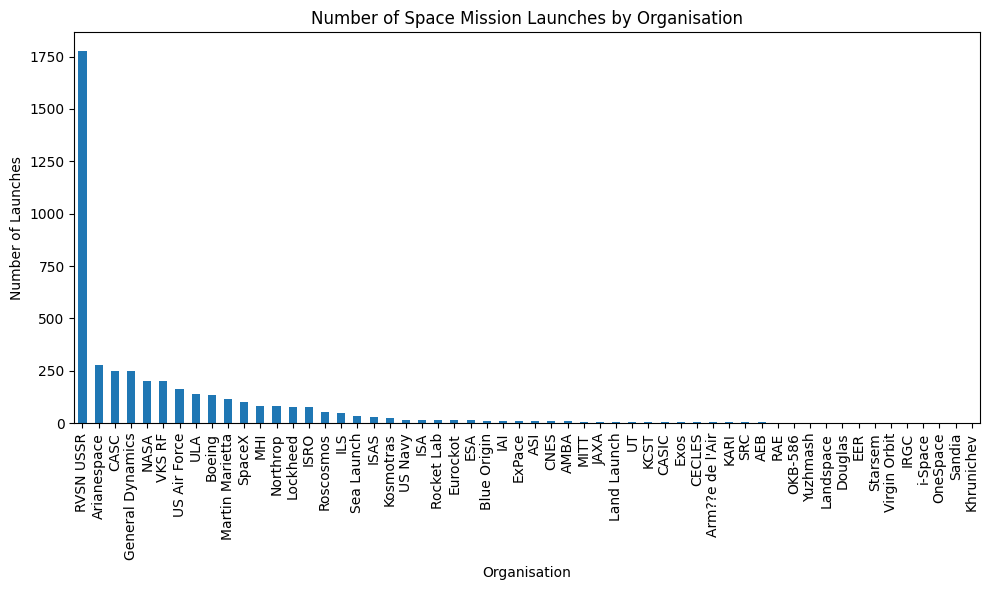

In [12]:
# Create the bar chart
plt.figure(figsize=(10, 6))
launches_by_org.plot(kind='bar')
plt.title('Number of Space Mission Launches by Organisation')
plt.xlabel('Organisation')
plt.ylabel('Number of Launches')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the chart
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [13]:
# Count the number of active vs retired rockets
rocket_status_counts = df_cleaned['Rocket_Status'].value_counts()

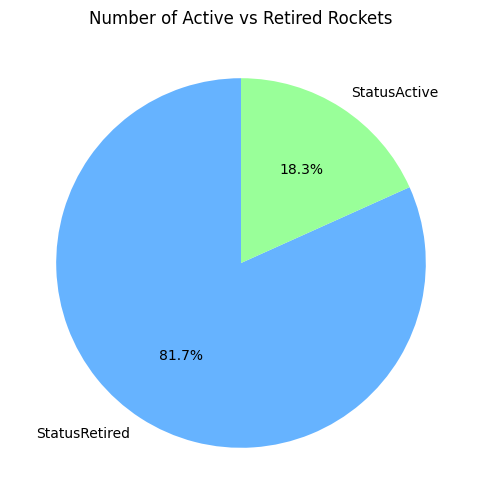

In [14]:
# Plotting the results in a pie chart
plt.figure(figsize=(6, 6))
rocket_status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Number of Active vs Retired Rockets')
plt.ylabel('')  # Remove y-axis label for better visual
plt.show()

In [15]:
# Display the counts for clarity
print(rocket_status_counts)

Rocket_Status
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

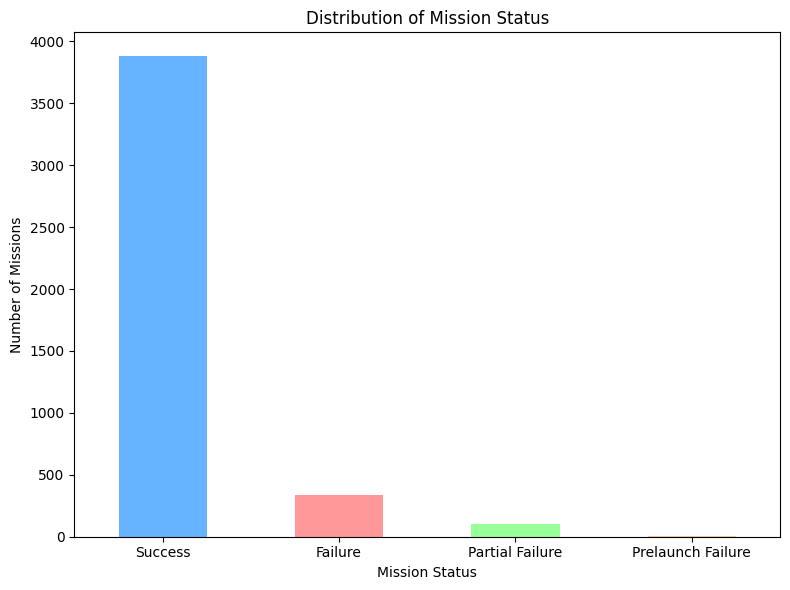

In [16]:
# Clean the 'Price' column by removing commas and converting to numeric
df_cleaned['Price'] = df_cleaned['Price'].replace({',': ''}, regex=True)
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'], errors='coerce')

# Count the number of missions by their status
mission_status_counts = df_cleaned['Mission_Status'].value_counts()

# Plot the distribution of mission statuses
plt.figure(figsize=(8, 6))
mission_status_counts.plot(kind='bar', color=['#66b3ff', '#ff9999', '#99ff99', '#ffcc99'])
plt.title('Distribution of Mission Status')
plt.xlabel('Mission Status')
plt.ylabel('Number of Missions')
plt.xticks(rotation=0)
plt.tight_layout()

# Display the chart
plt.show()

In [17]:
print(mission_status_counts)

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64


# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [18]:
df_cleaned_price = df_cleaned.dropna(subset=['Price'])

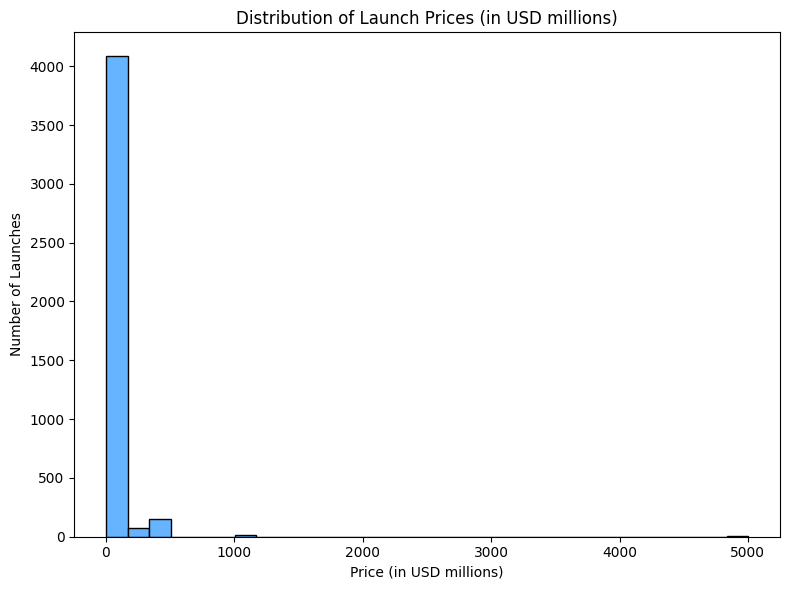

In [19]:
# Plot the histogram for the distribution of launch prices
plt.figure(figsize=(8, 6))
plt.hist(df_cleaned_price['Price'], bins=30, color='#66b3ff', edgecolor='black')
plt.title('Distribution of Launch Prices (in USD millions)')
plt.xlabel('Price (in USD millions)')
plt.ylabel('Number of Launches')
plt.tight_layout()

# Display the histogram
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [20]:
def extract_country(location):
    if 'Russia' in location or 'Barents Sea' in location:
        return 'Russian Federation'
    elif 'USA' in location or 'New Mexico' in location or 'Gran Canaria' in location or 'Pacific Missile' in location:
        return 'United States'
    elif 'China' in location or 'Yellow Sea' in location:
        return 'China'
    elif 'Shahrud Missile Test Site' in location:
        return 'Iran'
    else:
        # Try to extract the last part of the location as the country
        return location.split(',')[-1].strip()

# Apply the extraction function to get the country from the location
df_cleaned['Country'] = df_cleaned['Location'].apply(extract_country)

# Manually map problematic country names
def convert_to_iso3(country_name):
    # Handle United States and Russian Federation manually
    if country_name == "United States":
        return "USA"
    elif country_name == "Russian Federation":
        return "RUS"
    else:
        try:
            return countries.get(country_name).alpha3
        except KeyError:
            return None

# Convert the country names to ISO 3-letter codes
df_cleaned['Country_Code'] = df_cleaned['Country'].apply(convert_to_iso3)

# Check if 'USA' is in the Country_Code column
print(df_cleaned[df_cleaned['Country_Code'] == 'USA'].head())

# Count the number of launches per country
launches_by_country = df_cleaned['Country_Code'].value_counts().reset_index()
launches_by_country.columns = ['Country_Code', 'Launch_Count']

   Organisation                                       Location  \
0        SpaceX     LC-39A, Kennedy Space Center, Florida, USA   
2        SpaceX                  Pad A, Boca Chica, Texas, USA   
4           ULA       SLC-41, Cape Canaveral AFS, Florida, USA   
8        SpaceX       SLC-40, Cape Canaveral AFS, Florida, USA   
10     Northrop  LP-0B, Wallops Flight Facility, Virginia, USA   

                          Date                                        Detail  \
0   Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
2   Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
4   Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   
8   Mon Jul 20, 2020 21:30 UTC                  Falcon 9 Block 5 | ANASIS-II   
10  Wed Jul 15, 2020 13:46 UTC                        Minotaur IV | NROL-129   

   Rocket_Status  Price Mission_Status        Country Country_Code  
0   StatusActive  50.00        Success  United States

In [21]:
fig = px.choropleth(launches_by_country,
                    locations="Country_Code",
                    color="Launch_Count",
                    hover_name="Country_Code",
                    color_continuous_scale=px.colors.sequential.matter,
                    title="Number of Launches by Country")

fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [22]:
df_failures = df_cleaned[df_cleaned['Mission_Status'] == 'Failure'].copy()

# Convert country names to ISO 3-letter codes if missing
df_failures['Country_Code'] = df_failures['Country'].apply(convert_to_iso3)

# Count the number of failures per country
failures_by_country = df_failures['Country_Code'].value_counts().reset_index()
failures_by_country.columns = ['Country_Code', 'Failure_Count']

In [23]:
fig = px.choropleth(failures_by_country,
                    locations="Country_Code",
                    color="Failure_Count",
                    hover_name="Country_Code",
                    color_continuous_scale=px.colors.sequential.matter,
                    title="Number of Mission Failures by Country")

fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [24]:
# Group the data by country, organisation, and mission status, and count the occurrences
sunburst_data = df_cleaned.groupby(['Country', 'Organisation', 'Mission_Status']).size().reset_index(name='Mission_Count')

In [25]:
fig = px.sunburst(sunburst_data,
                  path=['Country', 'Organisation', 'Mission_Status'],
                  values='Mission_Count',  # Use the count of missions
                  title="Sunburst Chart of Countries, Organisations, and Mission Status",
                  color='Mission_Status')

# Show the chart
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [26]:
total_spent_by_org = df_cleaned_price.groupby('Organisation')['Price'].sum().reset_index()

In [27]:
total_spent_by_org = total_spent_by_org.sort_values(by='Price', ascending=False)


<ipython-input-28-3dcc7273e894>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




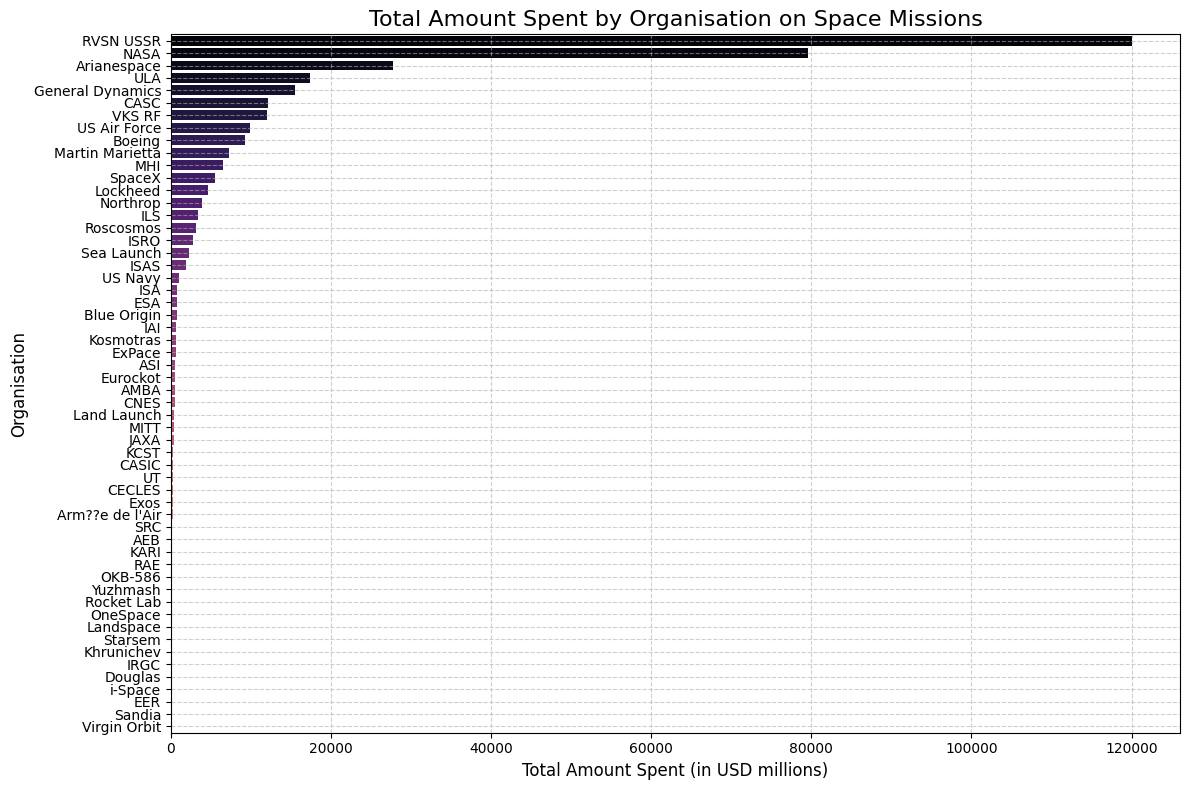

In [28]:
plt.figure(figsize=(12, 8))

# Create the barplot
sns.barplot(x='Price', y='Organisation', data=total_spent_by_org, palette='magma')

# Add a grid and improve axis labels
plt.grid(True, linestyle='--', alpha=0.6)
plt.title('Total Amount Spent by Organisation on Space Missions', fontsize=16)
plt.xlabel('Total Amount Spent (in USD millions)', fontsize=12)
plt.ylabel('Organisation', fontsize=12)

# Rotate y-axis labels to improve readability
plt.yticks(fontsize=10)

# Tight layout to ensure everything fits nicely
plt.tight_layout()

plt.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [29]:
avg_spent_per_launch_by_org = df_cleaned_price.groupby('Organisation')['Price'].mean().reset_index()



In [30]:
# Sort by average spent per launch in descending order
avg_spent_per_launch_by_org = avg_spent_per_launch_by_org.sort_values(by='Price', ascending=False)

<ipython-input-31-c0f9744f2679>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




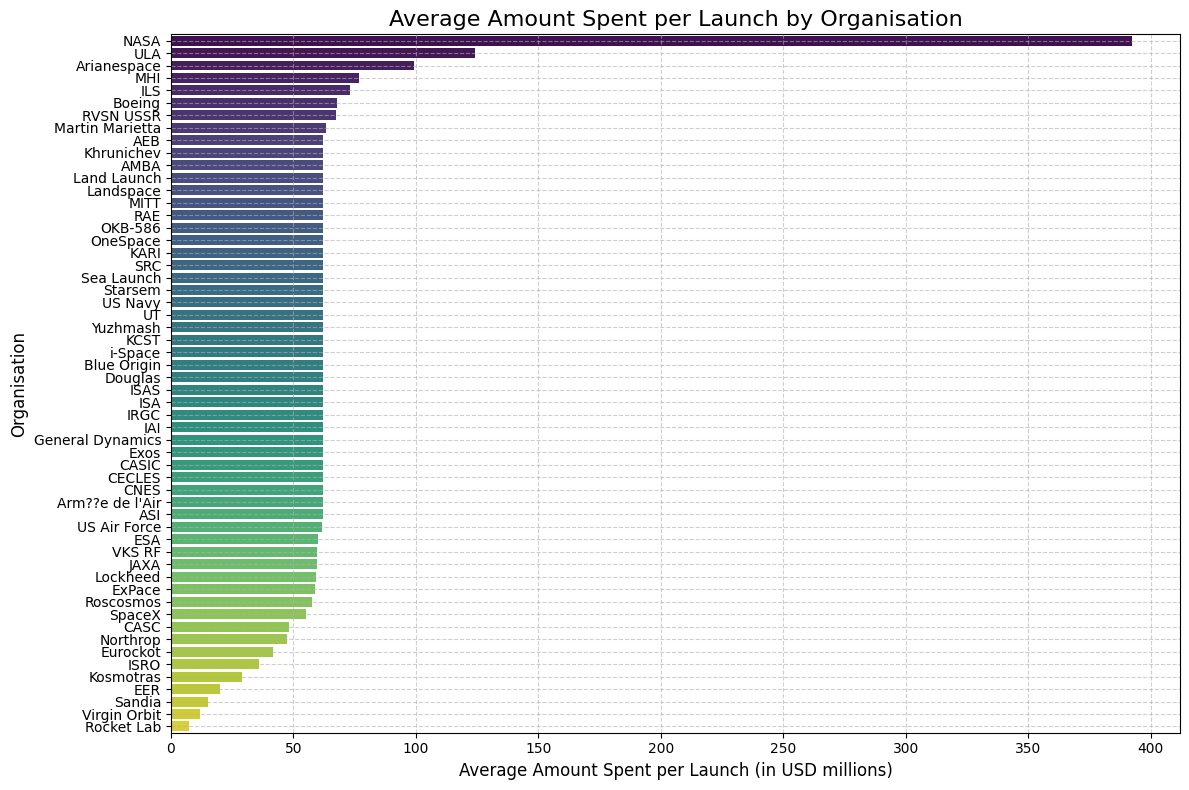

In [31]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Price', y='Organisation', data=avg_spent_per_launch_by_org, palette='viridis')
plt.title('Average Amount Spent per Launch by Organisation', fontsize=16)
plt.xlabel('Average Amount Spent per Launch (in USD millions)', fontsize=12)
plt.ylabel('Organisation', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Chart the Number of Launches per Year

In [32]:
# Convert the 'Date' column to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')

# Extract the year from the 'Date' column
df_cleaned['Year'] = df_cleaned['Date'].dt.year

# Group by year and count the number of launches
launches_per_year = df_cleaned.groupby('Year').size().reset_index(name='Launch_Count')

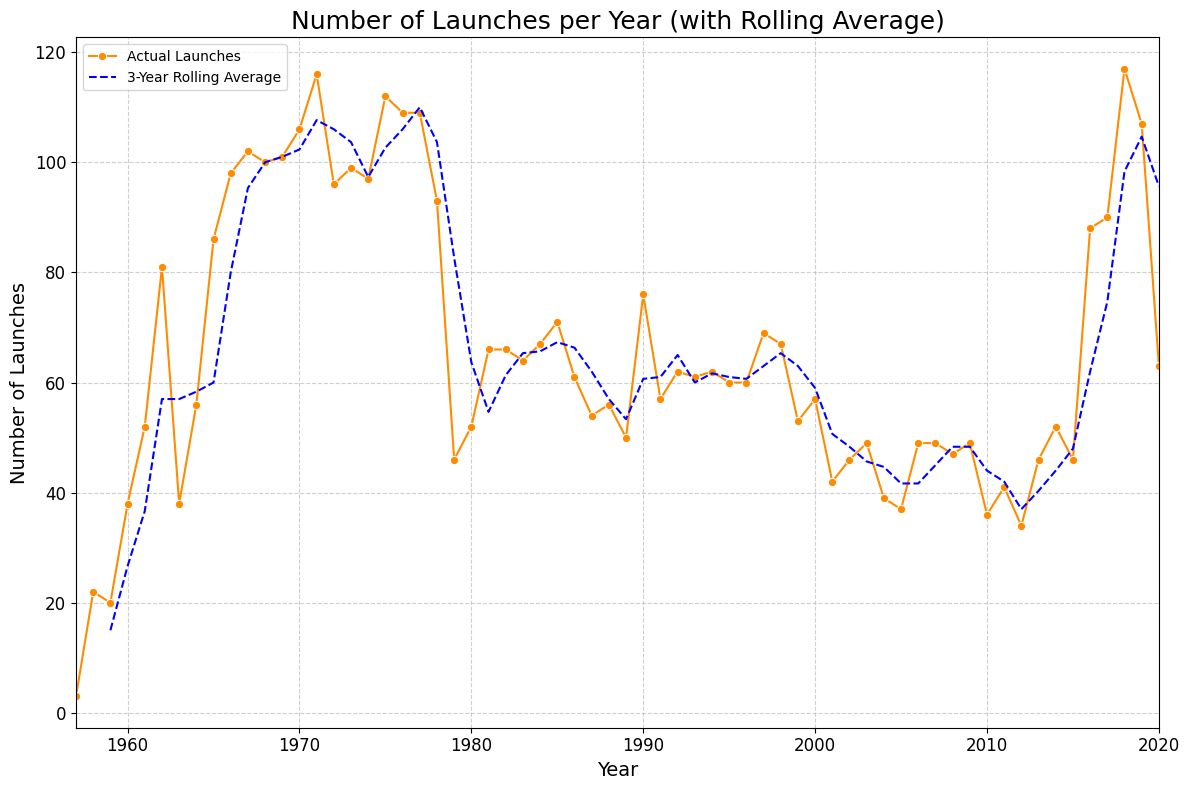

In [33]:
# Plot the data using seaborn
plt.figure(figsize=(12, 8))

# Plot the actual data
sns.lineplot(x='Year', y='Launch_Count', data=launches_per_year, marker='o', linestyle='-', color='darkorange', label='Actual Launches')

# Add a rolling average (optional for smoothing the trend)
launches_per_year['Rolling_Avg'] = launches_per_year['Launch_Count'].rolling(window=3).mean()
sns.lineplot(x='Year', y='Rolling_Avg', data=launches_per_year, color='blue', linestyle='--', label='3-Year Rolling Average')

# Set the x-axis to start from the first year with data
plt.xlim(left=launches_per_year['Year'].min(), right=launches_per_year['Year'].max())

# Add gridlines and improve the chart appearance
plt.grid(True, linestyle='--', alpha=0.6)


# Add gridlines and improve the chart appearance
plt.grid(True, linestyle='--', alpha=0.6)
plt.title('Number of Launches per Year (with Rolling Average)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a legend to distinguish between actual data and the rolling average
plt.legend()

# Tight layout to ensure everything fits nicely
plt.tight_layout()

plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [34]:
# Convert the 'Date' column to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')

# Group by year and month, then count the number of launches
df_cleaned['YearMonth'] = df_cleaned['Date'].dt.to_period('M').dt.to_timestamp()
launches_per_month = df_cleaned.groupby('YearMonth').size().reset_index(name='Launch_Count')

# Ensure 'YearMonth' is treated as a proper datetime object for plotting
launches_per_month['YearMonth'] = pd.to_datetime(launches_per_month['YearMonth'])

# Find the month with the highest number of launches from the raw data
max_launches_month = launches_per_month.loc[launches_per_month['Launch_Count'].idxmax()]

<ipython-input-34-04d0c81da598>:5: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



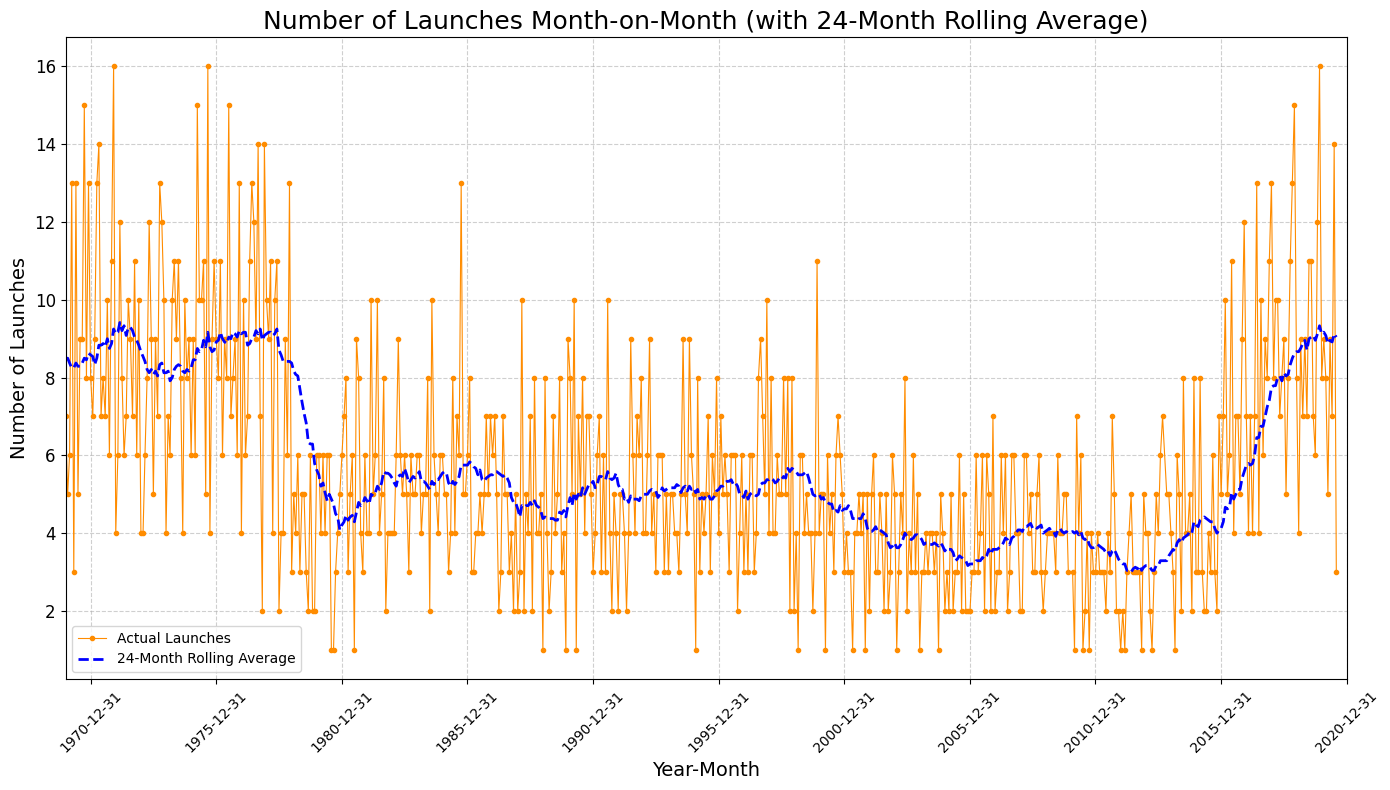

Month with highest number of launches: 1968-04-01 00:00:00 with 16 launches.


In [35]:
plt.figure(figsize=(14, 8))
plt.plot(launches_per_month['YearMonth'], launches_per_month['Launch_Count'], marker='o', markersize=3, linestyle='-', linewidth=0.8, color='darkorange', label='Actual Launches')

# Add a rolling average (24-month rolling window for smoothing)
launches_per_month['Rolling_Avg'] = launches_per_month['Launch_Count'].rolling(window=24).mean()
plt.plot(launches_per_month['YearMonth'], launches_per_month['Rolling_Avg'], color='blue', linestyle='--', linewidth=2, label='24-Month Rolling Average')

# Set x-axis limits to focus on the recent years
plt.xlim([pd.to_datetime('1970-01-01'), pd.to_datetime('2020-12-31')])

# Set x-axis ticks to show fewer points (every 5 years)
plt.xticks(pd.date_range(start='1970-01-01', end='2020-12-31', freq='5Y'), rotation=45, fontsize=10)

# Improve the chart appearance
plt.title('Number of Launches Month-on-Month (with 24-Month Rolling Average)', fontsize=18)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
plt.yticks(fontsize=12)

# Highlight the month with the highest number of launches
plt.annotate(f'Highest: {max_launches_month["Launch_Count"]}',
             xy=(max_launches_month['YearMonth'], max_launches_month['Launch_Count']),
             xytext=(max_launches_month['YearMonth'], max_launches_month['Launch_Count'] + 2),
             arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=12, color='red')

# Add gridlines and adjust grid appearance
plt.grid(True, linestyle='--', alpha=0.6)

# Add a legend to distinguish between actual data and the rolling average
plt.legend()

# Tight layout to ensure everything fits nicely
plt.tight_layout()

# Show the chart
plt.show()

# Find which month has seen the highest number of launches
print(f"Month with highest number of launches: {max_launches_month['YearMonth']} with {max_launches_month['Launch_Count']} launches.")

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [36]:
# Extract the month from the 'Date' column
df_cleaned['Month'] = df_cleaned['Date'].dt.month

# Group by month and count the number of launches
launches_per_month = df_cleaned.groupby('Month').size().reset_index(name='Launch_Count')

# Sort by the number of launches (optional, to identify most and least popular months)
launches_per_month = launches_per_month.sort_values(by='Launch_Count', ascending=False)

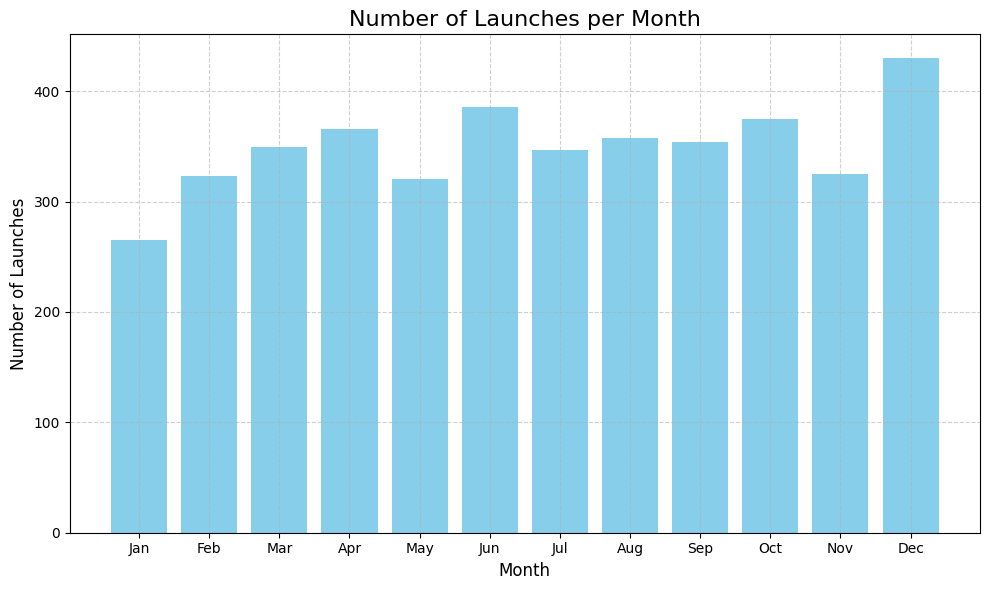

Most popular month for launches: 12.0 with 430.0 launches.
Least popular month for launches: 1.0 with 265.0 launches.


In [37]:
# Plot the data using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(launches_per_month['Month'], launches_per_month['Launch_Count'], color='skyblue')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Number of Launches per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Launches', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the chart
plt.show()

# Identify the most and least popular months
most_popular_month = launches_per_month.iloc[0]
least_popular_month = launches_per_month.iloc[-1]

print(f"Most popular month for launches: {most_popular_month['Month']} with {most_popular_month['Launch_Count']} launches.")
print(f"Least popular month for launches: {least_popular_month['Month']} with {least_popular_month['Launch_Count']} launches.")

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [41]:
# Convert the 'Date' column to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')

# Drop rows with missing or NaN 'Price' values
df_price_cleaned = df_cleaned.dropna(subset=['Price'])

# Convert 'Price' column to numeric (in case there are any formatting issues)
df_price_cleaned['Price'] = pd.to_numeric(df_price_cleaned['Price'], errors='coerce')

# Group by year and calculate the average price of launches for each year
df_price_cleaned['Year'] = df_price_cleaned['Date'].dt.year
avg_price_per_year = df_price_cleaned.groupby('Year')['Price'].mean().reset_index()

# Add a rolling average for smoother line
avg_price_per_year['Rolling_Avg'] = avg_price_per_year['Price'].rolling(window=3).mean()

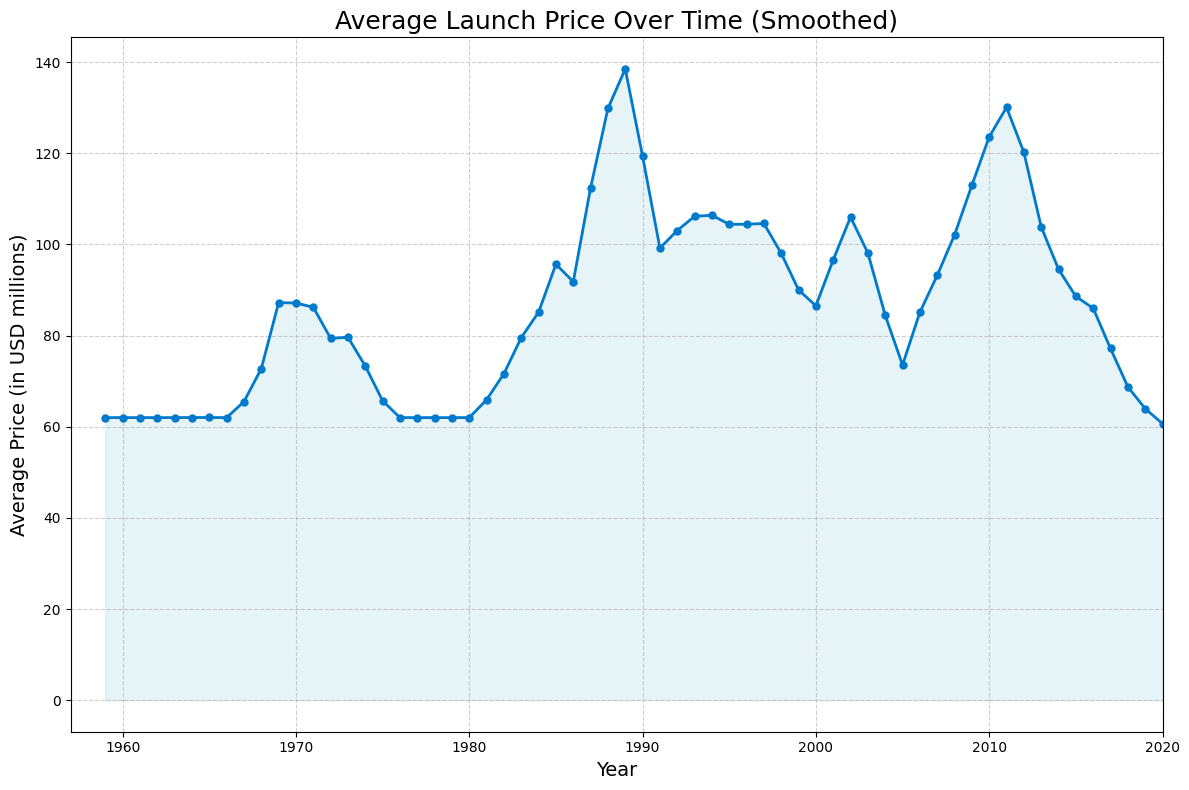

In [43]:
# Plot the line chart
plt.figure(figsize=(12, 8))

plt.xlim(left=avg_price_per_year['Year'].min(), right=avg_price_per_year['Year'].max())

# Line plot with markers
plt.plot(avg_price_per_year['Year'], avg_price_per_year['Rolling_Avg'], marker='o', linestyle='-', color='#007acc', linewidth=2, markersize=5, label='Average Price')

# Fill the area under the curve
plt.fill_between(avg_price_per_year['Year'], avg_price_per_year['Rolling_Avg'], color='#add8e6', alpha=0.3)

# Add labels and title
plt.title('Average Launch Price Over Time (Smoothed)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Price (in USD millions)', fontsize=14)

# Improve the grid appearance
plt.grid(True, linestyle='--', alpha=0.6)

# Tight layout to ensure everything fits nicely
plt.tight_layout()

# Show the chart
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [50]:
# Convert the 'Date' column to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')

# Drop rows where 'Organisation' or 'Date' is missing
df_org_cleaned = df_cleaned.dropna(subset=['Organisation', 'Date'])

# Extract the year from the 'Date' column
df_org_cleaned['Year'] = df_org_cleaned['Date'].dt.year

# Count the total number of launches by organisation
launches_by_org = df_org_cleaned['Organisation'].value_counts().head(10).index

<ipython-input-50-9b77b9dbf68f>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
# Filter the dataset to include only the top 10 organisations
df_top_orgs = df_org_cleaned[df_org_cleaned['Organisation'].isin(launches_by_org)]

# Group by year and organisation, and count the number of launches
launches_per_year_org = df_top_orgs.groupby(['Year', 'Organisation']).size().reset_index(name='Launch_Count')

# Pivot the table to get organisations as columns for easier plotting
launches_pivot = launches_per_year_org.pivot(index='Year', columns='Organisation', values='Launch_Count').fillna(0)

# Define different line styles and colors
line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--']
line_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
               '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

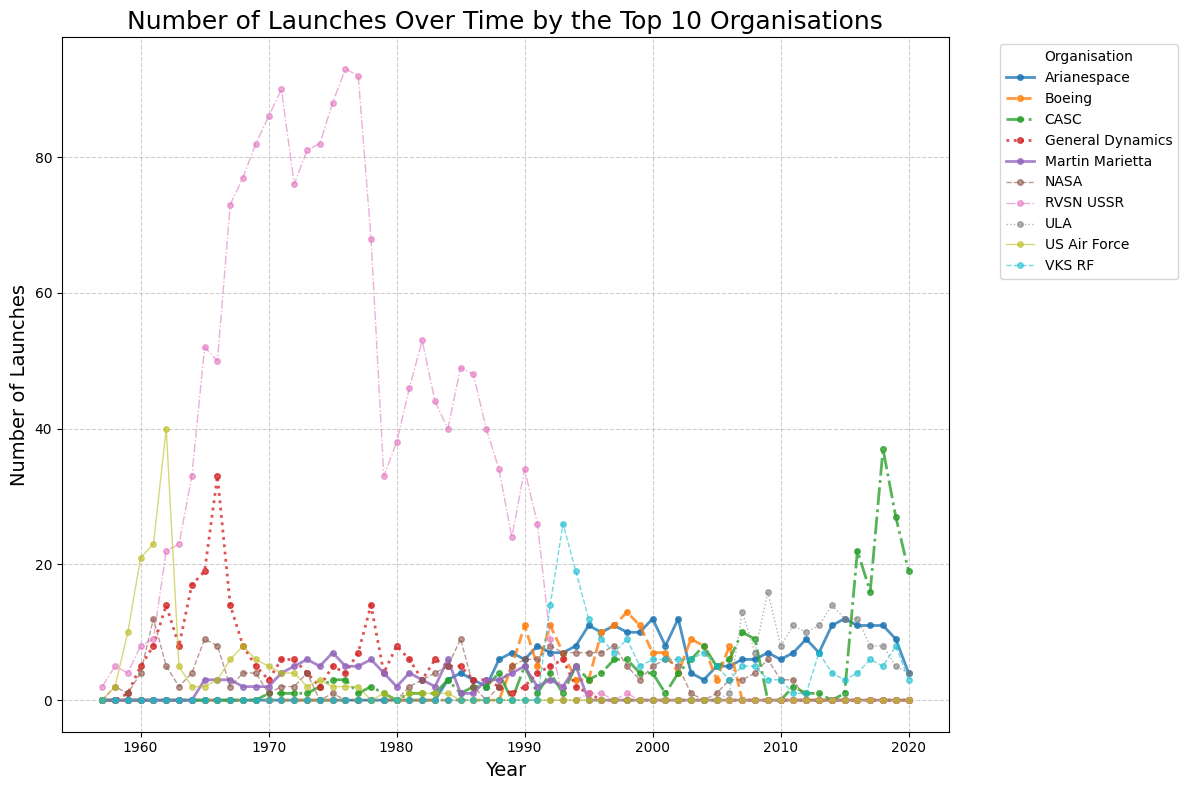

In [52]:
# Plot the data using a line chart for each organisation
plt.figure(figsize=(12, 8))

# Plot each organisation's launch trend over time with distinct line styles, transparency, and thickness
for i, organisation in enumerate(launches_pivot.columns):
    plt.plot(launches_pivot.index, launches_pivot[organisation],
             marker='o', markersize=4, linestyle=line_styles[i % len(line_styles)],
             linewidth=2 if i < 5 else 1, alpha=0.8 if i < 5 else 0.6, color=line_colors[i], label=organisation)

# Add labels, title, and legend
plt.title('Number of Launches Over Time by the Top 10 Organisations', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)

# Place the legend outside the plot for better readability
plt.legend(title='Organisation', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Add gridlines and adjust the layout
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the chart
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [53]:
# Filter the dataset to include launches up to 1991 (Cold War period)
df_cold_war = df_cleaned[df_cleaned['Date'].dt.year <= 1991]

# Identify organisations and countries representing USA and USSR
usa_orgs = ['NASA', 'US Air Force']
ussr_orgs = ['RVSN USSR', 'VKS RF']

# Identify locations from former Soviet republics like Kazakhstan
soviet_republic_locations = ['Kazakhstan', 'Baikonur Cosmodrome', 'Plesetsk Cosmodrome', 'Russia']

In [54]:
# Create a new column 'Country' to map the countries of USA and USSR
def classify_country(row):
    if row['Organisation'] in usa_orgs or 'USA' in row['Location']:
        return 'USA'
    elif row['Organisation'] in ussr_orgs or any(loc in row['Location'] for loc in soviet_republic_locations):
        return 'USSR'
    else:
        return None

df_cold_war['Country'] = df_cold_war.apply(classify_country, axis=1)

<ipython-input-54-7446752aee6e>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [55]:
# Filter out rows where the country is not identified (e.g., other countries)
df_usa_ussr = df_cold_war[df_cold_war['Country'].notna()]

# Count the total number of launches by country (USA vs USSR)
launch_count_by_country = df_usa_ussr['Country'].value_counts().reset_index()
launch_count_by_country.columns = ['Country', 'Launch_Count']


In [56]:
# Create the Plotly Pie Chart
fig = px.pie(launch_count_by_country,
             names='Country',
             values='Launch_Count',
             title='Total Number of Launches: USA vs USSR (Cold War)')

# Show the chart
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [57]:
# Filter out rows where the country is not identified (e.g., other countries)
df_usa_ussr = df_cold_war[df_cold_war['Country'].notna()]

# Extract the year from the 'Date' column
df_usa_ussr['Year'] = df_usa_ussr['Date'].dt.year

# Group by year and country, and count the number of launches
launches_per_year = df_usa_ussr.groupby(['Year', 'Country']).size().reset_index(name='Launch_Count')

# Pivot the table to have 'Year' as rows and 'Country' as columns
launches_pivot = launches_per_year.pivot(index='Year', columns='Country', values='Launch_Count').fillna(0)

<ipython-input-57-f0c2ffb57e8a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



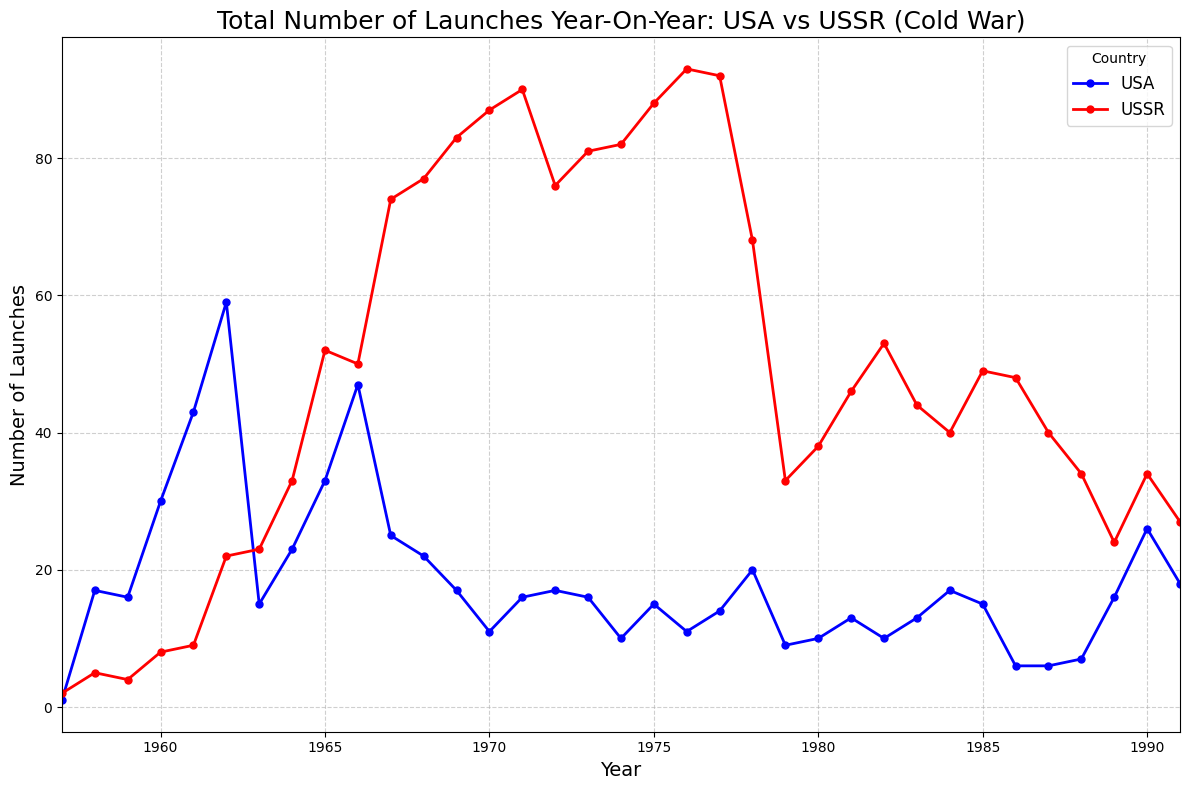

In [59]:
# Plot the data for USA vs USSR
plt.figure(figsize=(12, 8))

plt.xlim(left=launches_pivot.index.min(), right=launches_pivot.index.max())

# Plot USA launches
plt.plot(launches_pivot.index, launches_pivot['USA'], marker='o', markersize=5, linestyle='-', linewidth=2, color='blue', label='USA')

# Plot USSR launches
plt.plot(launches_pivot.index, launches_pivot['USSR'], marker='o', markersize=5, linestyle='-', linewidth=2, color='red', label='USSR')

# Add labels, title, and legend
plt.title('Total Number of Launches Year-On-Year: USA vs USSR (Cold War)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
plt.legend(title='Country', fontsize=12)

# Add gridlines and adjust the layout
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the chart
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

In [61]:
# Filter out rows where 'Mission_Status' is missing
df_cleaned = df_cleaned.dropna(subset=['Mission_Status'])

# Filter the data for failed missions (assuming 'Failure' or 'Failed' in 'Mission_Status')
df_failures = df_cleaned[df_cleaned['Mission_Status'].str.contains('Failure|Failed', case=False)]

# Extract the year from the 'Date' column using .loc[] to avoid the SettingWithCopyWarning
df_failures.loc[:, 'Year'] = df_failures['Date'].dt.year

# Group by year and count the number of failures
failures_per_year = df_failures.groupby('Year').size().reset_index(name='Failure_Count')

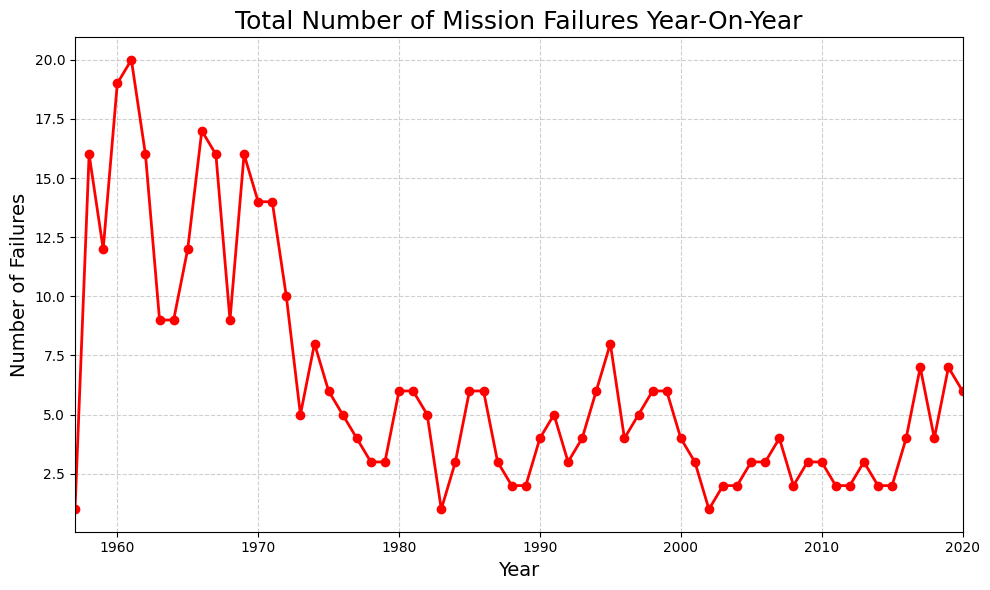

In [63]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(failures_per_year['Year'], failures_per_year['Failure_Count'], marker='o', linestyle='-', color='red', linewidth=2)

plt.xlim(left=failures_per_year['Year'].min(), right=failures_per_year['Year'].max())

# Add labels, title, and grid
plt.title('Total Number of Mission Failures Year-On-Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Failures', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust the layout
plt.tight_layout()

# Show the chart
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [64]:
# Convert the 'Date' column to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')

# Filter out rows where 'Mission_Status' is missing
df_cleaned = df_cleaned.dropna(subset=['Mission_Status'])

# Extract the year from the 'Date' column
df_cleaned['Year'] = df_cleaned['Date'].dt.year

# Total number of launches per year
total_launches_per_year = df_cleaned.groupby('Year').size().reset_index(name='Total_Launches')

In [65]:
# Filter the data for failed missions (assuming 'Failure' or 'Failed' in 'Mission_Status')
df_failures = df_cleaned[df_cleaned['Mission_Status'].str.contains('Failure|Failed', case=False)]

# Count the number of failures per year
failures_per_year = df_failures.groupby('Year').size().reset_index(name='Failure_Count')

# Merge total launches and failures on 'Year'
launches_failures = pd.merge(total_launches_per_year, failures_per_year, on='Year', how='left')

# Fill NaN values in 'Failure_Count' with 0 (in case of years with no failures)
launches_failures['Failure_Count'].fillna(0, inplace=True)

# Calculate the percentage of failures
launches_failures['Failure_Percentage'] = (launches_failures['Failure_Count'] / launches_failures['Total_Launches']) * 100

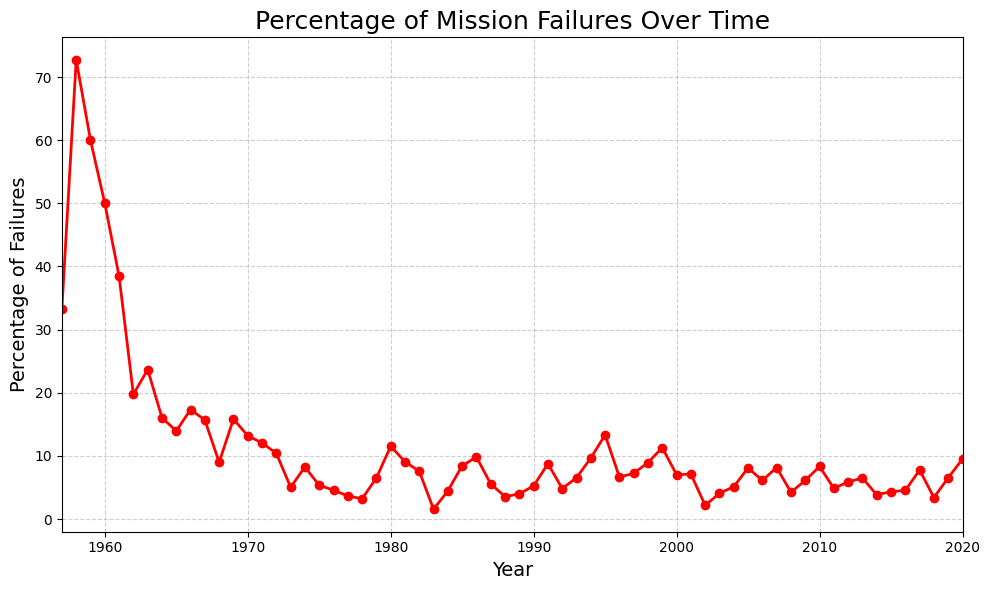

In [67]:
# Plot the percentage of failures over time
plt.figure(figsize=(10, 6))
plt.plot(launches_failures['Year'], launches_failures['Failure_Percentage'], marker='o', linestyle='-', color='red', linewidth=2)

plt.xlim(left=launches_failures['Year'].min(), right=launches_failures['Year'].max())

# Add labels, title, and grid
plt.title('Percentage of Mission Failures Over Time', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Failures', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust the layout
plt.tight_layout()

# Show the chart
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [78]:
# Extract the year from the 'Date' column
df_cleaned['Year'] = df_cleaned['Date'].dt.year

# Filter out launches up to and including 2020
df_cleaned = df_cleaned[df_cleaned['Year'] <= 2020]

# Filter the data for total launches per country per year
total_launches_per_country = df_cleaned.groupby(['Year', 'Country']).size().reset_index(name='Total_Launches')

# Find the country with the most launches for each year
lead_country_total = total_launches_per_country.loc[total_launches_per_country.groupby('Year')['Total_Launches'].idxmax()]

# Now filter for successful launches only
df_success = df_cleaned[df_cleaned['Mission_Status'].str.contains('Success', case=False)]

# Filter the data for successful launches per country per year
successful_launches_per_country = df_success.groupby(['Year', 'Country']).size().reset_index(name='Successful_Launches')

# Find the country with the most successful launches for each year
lead_country_success = successful_launches_per_country.loc[successful_launches_per_country.groupby('Year')['Successful_Launches'].idxmax()]


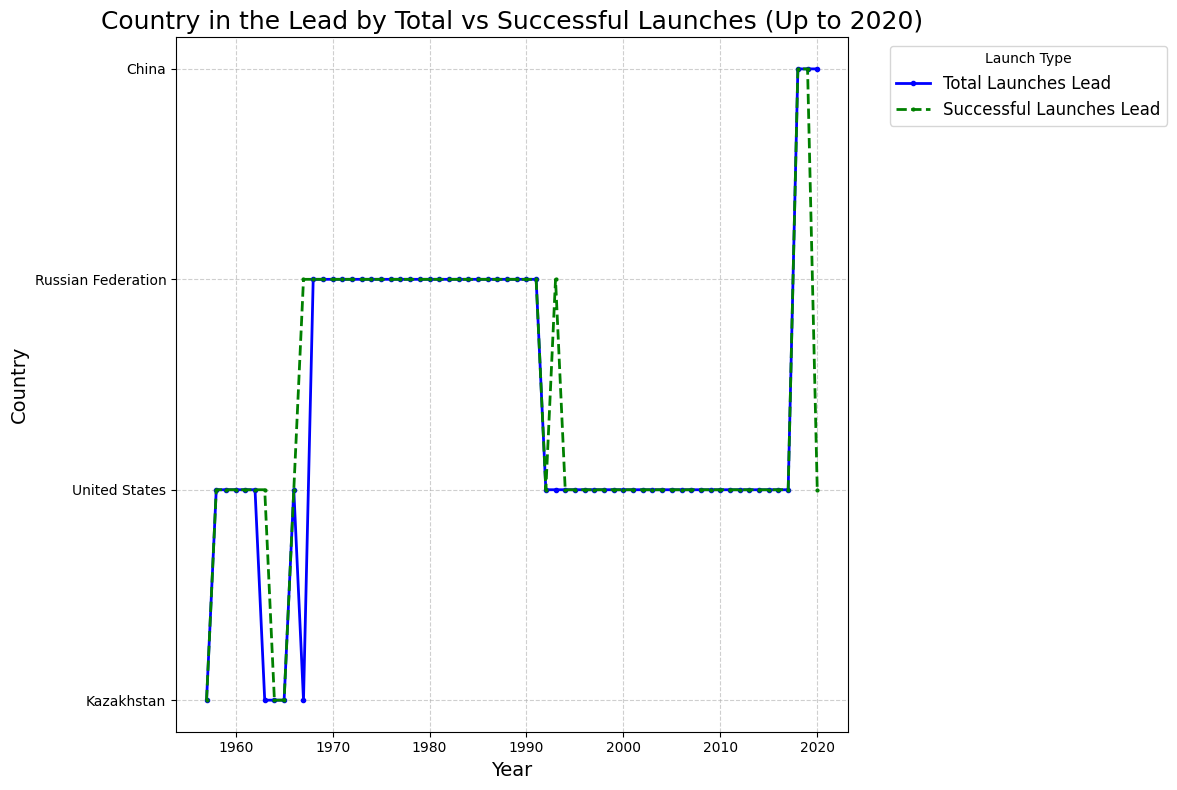

In [79]:
# Plot the total launches lead over time
plt.figure(figsize=(12, 8))

# Assign unique colors to each country
countries_colors = {'United States': 'blue', 'Russian Federation': 'red', 'China': 'green', 'Kazakhstan': 'orange'}

# Plot total launches lead over time using lines with markers only at transitions
plt.plot(lead_country_total['Year'], lead_country_total['Country'], marker='o', linestyle='-',
         color='blue', linewidth=2, label='Total Launches Lead', markersize=3)

# Plot successful launches lead over time using dashed lines with smaller markers only at transitions
plt.plot(lead_country_success['Year'], lead_country_success['Country'], marker='o', linestyle='--',
         color='green', linewidth=2, label='Successful Launches Lead', markersize=2)

# Add labels, title, and grid
plt.title('Country in the Lead by Total vs Successful Launches (Up to 2020)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Country', fontsize=14)

# Move the legend outside the plot for better clarity
plt.legend(title='Launch Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Add gridlines and adjust the layout
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the chart

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [80]:
# Extract the year from the 'Date' column
df_cleaned['Year'] = df_cleaned['Date'].dt.year

# Group the data by year and organisation to count the number of launches per year per organisation
launches_per_org_year = df_cleaned.groupby(['Year', 'Organisation']).size().reset_index(name='Launch_Count')

# Find the organisation with the most launches for each year
lead_org_per_year = launches_per_org_year.loc[launches_per_org_year.groupby('Year')['Launch_Count'].idxmax()]


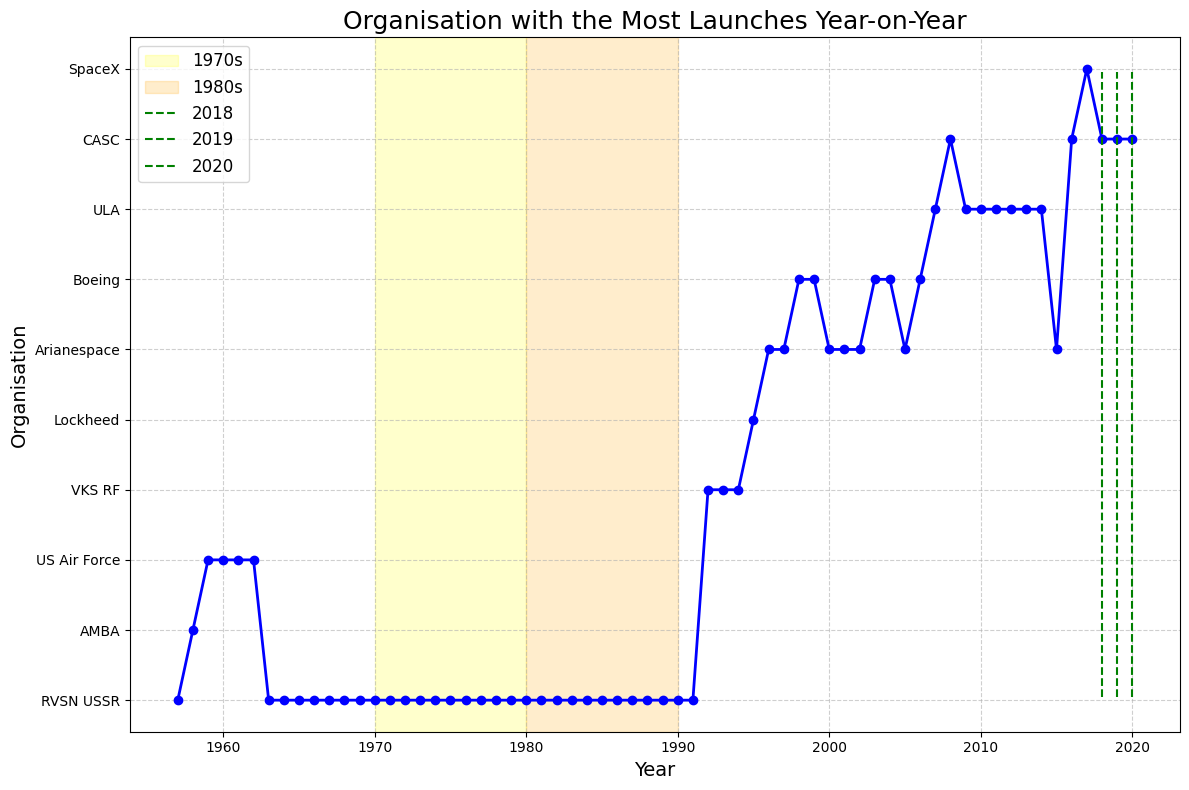

In [82]:
# Plot the data
plt.figure(figsize=(12, 8))

# Plot the organisation in the lead for each year
plt.plot(lead_org_per_year['Year'], lead_org_per_year['Organisation'], marker='o', linestyle='-', color='blue', linewidth=2)

# Add labels, title, and grid
plt.title('Organisation with the Most Launches Year-on-Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Organisation', fontsize=14)

# Highlight the specific periods of interest
plt.axvspan(1970, 1980, color='yellow', alpha=0.2, label='1970s')
plt.axvspan(1980, 1990, color='orange', alpha=0.2, label='1980s')

# Correct the green lines for 2018, 2019, and 2020 with y-limits
plt.axvline(x=2018, ymin=0.05, ymax=0.95, color='green', linestyle='--', label='2018')
plt.axvline(x=2019, ymin=0.05, ymax=0.95, color='green', linestyle='--', label='2019')
plt.axvline(x=2020, ymin=0.05, ymax=0.95, color='green', linestyle='--', label='2020')

# Add legend and grid
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

In [83]:
print(lead_org_per_year[(lead_org_per_year['Year'] >= 1970) & (lead_org_per_year['Year'] < 1990)])
print(lead_org_per_year[lead_org_per_year['Year'].isin([2018, 2019, 2020])])

     Year Organisation  Launch_Count
74   1970    RVSN USSR            86
87   1971    RVSN USSR            90
95   1972    RVSN USSR            76
102  1973    RVSN USSR            81
109  1974    RVSN USSR            82
119  1975    RVSN USSR            88
126  1976    RVSN USSR            93
133  1977    RVSN USSR            92
140  1978    RVSN USSR            68
147  1979    RVSN USSR            33
155  1980    RVSN USSR            38
164  1981    RVSN USSR            46
172  1982    RVSN USSR            53
182  1983    RVSN USSR            44
192  1984    RVSN USSR            40
200  1985    RVSN USSR            49
207  1986    RVSN USSR            48
215  1987    RVSN USSR            40
225  1988    RVSN USSR            34
235  1989    RVSN USSR            24
     Year Organisation  Launch_Count
585  2018         CASC            37
601  2019         CASC            27
618  2020         CASC            19
